# Digits Classifier

## Author and Creation Information
Autor: Humberto de Jesús Jiménez Gutiérrez

Fecha: 08/10/2023

## Introduction
En este apartado se propone explorar dos técnicas de aprendizaje supervisado para la clasificación de dígitos, redes neuronales y máquinas de soporte vectorial. El objetivo y motivación parte de una suposición sencilla: se desea conocer qué dígito está escrito en una imagen sin tener que hacer el reconocimiento uno mismo. En resumen, se desea entregar imágenes a la computadora y que esta, a partir de un modelo de machine learning, determine por sí sola cuál es la respuesta.

Se podría pensar que para una sola imagen, o cinco o quizás veinte, resultaría un trabajo más fácil hacerlo manual; es decir, que una persona determine los dígitos de la imagen. En cambio, se supone también que la cantidad de imágenes a evaluar corresponde a cientos o miles, donde el problema deja de ser trivial. La aplicación de machine learning como solución ayudaría a mejorar el proceso.


El caso de clasificar los dígitos corresponde a una aplicación sencilla del aprendizaje supervido, pero no es todo lo que puede hacer. Lo que se pretende, en cambio, es demostrar cosas pequeñas pero interesantes, que luego se podrían extender a aplicaciones más complejas como la detección facial u otras más divertidas, como la clasificación de perros y gatos.

## Dataset
Para este trabajo, se utilizará un conjunto de datos disponible en sklearn para el entrenamiento y la evaluación de los modelos de Machine Learning. Específicamente, se utilizará el dataset accesible mendiante **sklearn.datasets.load_digits**. Esta función devulve un diccionario con el conjunto de datos e información relacionada. Asimismo, permite definir el número de clases que se desean cargar. Para nuestro interés, se cargarán las 10 clases correspondientes a los dígitos del 0 a 9.

En la siguiente celda, podemos ver cuál es la información proporcionada por **load_digits**, con principal interés en **data** que contiene el conjunto de datos correspondiente a las variables predictoras, **target** que contiene los datos correspondientes a la variable dependiente, y otros relevantes como **feature_names**.

In [1]:
# import dependencies
from sklearn.datasets import load_digits

# load dataset with 10 classes
digits = load_digits(n_class=10)

# information loaded
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Features names
En la siguiente celda podemos ver el contenido en **feature_names**. Con esta información, podemos saber que cada renglón del conjunto de datos tiene 64 columnas y cada una representa un pixel de la imagen. Asimismo, de acuerdo a la enumeración de las columnas, podemos saber que la imagen se compone de 8x8 pixeles.

In [2]:
print("Number of features:", len(digits['feature_names']))
print(digits['feature_names'])

Number of features: 64
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


### **X** and **y** datasets
Por convención, separamos el conjunto de datos que posee las variables predictoras y la variable dependiente, en dos nuevas variables llamadas **X** y **y**. El objetivo de esto es seguir adelante con una notación no solo más familiar, sino también conveniente al momento de, por ejemplo, dividir los datos en subconjuntos de entrenamiento y prueba.

In [3]:
X, y = digits.data, digits.target

### Data size
En la siguiente celda se evalúa el tamaño del conjunto de datos y se confirma las 64 columnas de descritas anteriormente y que corresponden a los pixeles de una imagen. Además, encontramos que este conjunto dispone de 1797 observaciones.

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


### Target
Para conocer más sobre el conjunto de datos con el que se está trabajando, una forma común es mostrar una parte de ellos, encontrar los valores únicos y graficar la distribuciones. En este caso, para la variable dependiente se muestran los primeros 20 elementos y los valores únicos.

Los resultados de los 20 elementos, recordemos, representan los números que están escritos en la imagen correspondiente. Eso quiere decir, por ejemplo, que el primer elemente corresponde al dígito cero, el segundo corresponde al dígito 1, etc. Esto último se complementará más adelante de manera visual.

En cuanto a los valores únicos, podemos corroborar que en el conjunto de datos tenemos un total de 10 clases, dígitos del 0 hasta el 9. Esto no es sorpresa pues al momento de cargar los datos, indicamos que queríamos 10 clases. Sin embargo, nos sirve para validar que estos se encuentran en forma.

Por último, respecto a la gráfica del conteo de los valores únicos, podemos observar que las clases se encuentran aproximadamente distribuidos de manera uniforme, lo que nos lleva a concluir que el conjunto de datos se encuentra balanceado.

Sample of y: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Target unique values: [0 1 2 3 4 5 6 7 8 9]


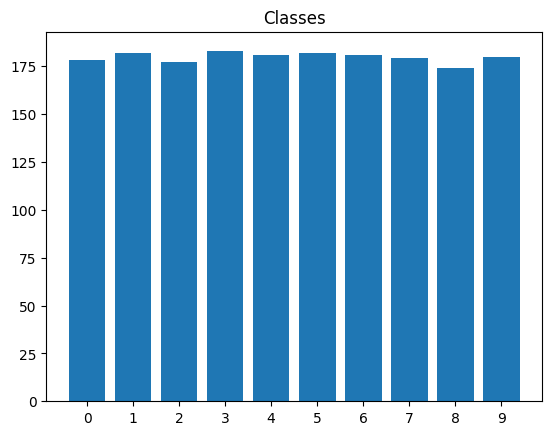

In [5]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# sample of y
print('Sample of y:', y[:20])

# unique values
uniques, counts = np.unique(y, return_counts=True)
print('Target unique values:', uniques)

# show distribution
plt.title("Classes")
plt.ylim(0, max(counts) + 10)
plt.bar(uniques.astype('str'), counts)
plt.show()

###Features
De igual manera, podemos imprimmir una muestra de los datos que se utilizarán para predecir los dígitos. En la siguiente celda se muestra únicamente el primer elemento. Sin embargo, para una interpretación, esta impresión no resulta de mucha ayuda.

In [6]:
# sample of X
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Se sabe que las columnas del conjunto de datos representan en realidad pixeles, y que están ordenados de 8 en 8. Para esto, se podría imprimir nuevamente el primer renglón transformado a una nueva estructura correspondiente a una matríz de 8x8.

Al realizar la impresión, aunque arroja un resultado visual más coherente con lo que corresponde, todavía no resulta de mucha ayuda.

In [7]:
print(X[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


En lugar de mostrarlo como una matriz, esa matriz se podría utilizar para crear una imagen y así corroborar lo que se ha dicho desde el inicio, que cada renglón representa una imagen con un dígito.
Para esto, se sigue tomando de muestra el primer elemento del conjunto, se transforma a una matriz de 8x8 y de muestra como imagen. El resultado, es que corresponde al dígito cero.

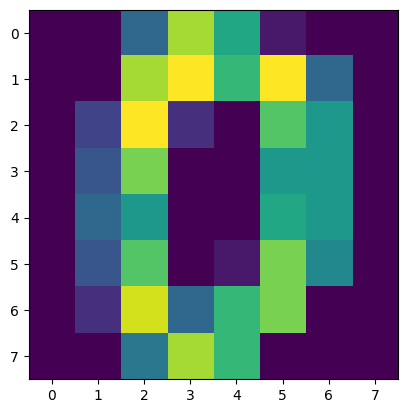

In [8]:
plt.imshow(X[0].reshape(8, 8))
plt.show()

Finalmente, para concluir esta pequeña exploración de los datos, en la siguiente celda se repite el proceso utilizado para mostrar la imagen de los primeros 8 elementos. En esta ocasión, se utiliza una escala de grises donde podemos observar que las imágenes tiene fondo negro y los dígitos están escrito con blanco.

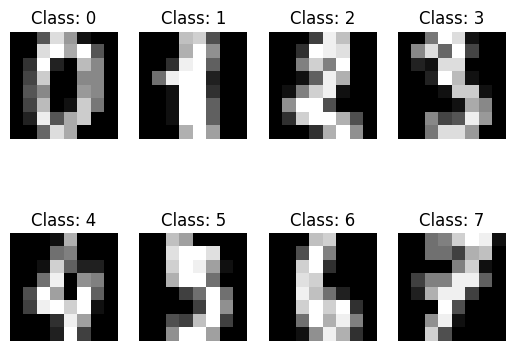

In [9]:
# use a for loop to display 8 elements
for i in range(8):
    # divide the image into a grid of 2 by 4
    plt.subplot(2, 4, i+1)
    # display the digit class
    plt.title("Class: "+ str(y[i]))
    # display the digit image
    plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

## Neural Network
Hemos llegado a la parte divertida, la construcción y entrenamiento del modelo.
En esta primera parte, se utilizará la implementación de sklearn de los Perceptrones de Multicapa, debido a la baja complejidad del problema y a la simplesa que nos proporciona sklearn para su construcción.

En el siguiente bloque, el conjunto de datos **X** y  **y** se dividen en dos subconjuntos, uno para entrenar el modelo y otra para evaluarlo. Esta separación es importante porque permite darnos una idea del desempeño que tendrá el modelo cuando se pruebe con datos que no haya visto antes, datos nuevos.

Así, se procede a la construcción de la red neuronal como una instancia de **MLPClassifier**, y se entrena.

Posteriormente, se utiliza el modelo para predecir los datos que se reservaron para su evaluación y se compara con los resultados reales.

Para evaluar un modelo de clasificación existen diferentes métricas como la exactitud, la presición, F1-Score, etc. En este caso, se utiliza la métrica de exactitud o **accuracy** porque nos interesa que el modelo realice el mayor número de predicciones correctas.
Así, se encuentra una exactitud arriba de 90%, lo cuál representa un modelo muy bueno.

In [10]:
# import dependencies
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# build and train the model with the training data
model = MLPClassifier()
model.fit(X_train, y_train)

# evaluate the model with testing data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9755555555555555


Ahora, con nuestra red neuronal entrenada, estamos en disposición de utilizarla para predecir los dígitos escritos en imágenes. En la celda siguiente, se elige al azar una imagen del subconjunto de datos para pruebas y se imprime junto a la clase real y la clase predicha por el modelo.
Dado que nuestro modelo no es 100% exacto, al ejecutar la celda podría bien predecir el dígito de manera correcta o no, es por eso que tener una métrica como la exactitud es importante, ya que nos proporciona una idea general sobre el desempeño que debemos esperar.

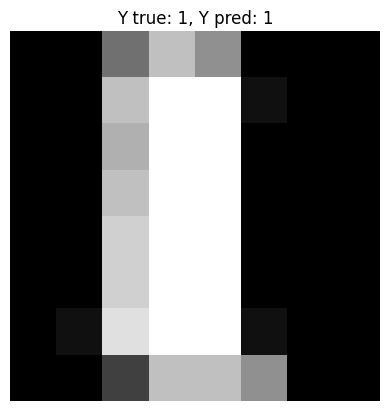

In [11]:
# import dependencies
import random

# select a random element
i = random.randint(0, y_test.shape[0])

# show the element with the true and the predicted class
plt.title("Y true: {0}, Y pred: {1}".format(y_test[i], model.predict([X_test[i]])[0]))
plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## Cross Validation
Para reducir las posibilidades de que nuestro modelo presente los síntomas de lo que se conoce como sobreajuste u **overfitting**, podemos recurrir a una herramienta de sklear llamada **GridSearchCV**. Esta herramienta nos permite definir un conjunto de hiperparámetros para el modelo, entrenar modelos para los hiperparámetros indicados y evaluarlos mediante **validación cruzada**. En resumen, GridSearchCV facilita el trabajo para encontrar el mejor modelo y proporciona gran información como el desempeño y los resultados de la validación cruzada.

In [12]:
# import dependencies
from sklearn.model_selection import GridSearchCV

# build model
model = MLPClassifier(max_iter=1000)

# define hyperparameters
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 10), (64, 10, 64), (100), (100, 100), (100, 50, 100)],
}

# create an instance of GridSearchCV
mlp_grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=10)

# fit the instance
mlp_grid.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000),
             param_grid={'hidden_layer_sizes': [(64,), (64, 10), (64, 10, 64),
                                                100, (100, 100),
                                                (100, 50, 100)]},
             scoring='accuracy')

Al finalizar el proceso de GridSearchCV, podemos imprimir los resultados de la validación cruzada.

En la siguiente celda se muestra la información más relevante como el ranking de los modelos basado en la exactitud media obtenida, los hiperparámetros empleados, el tiempo medio de ajuste y el tiempo medio de puntuación.

En este caso, basta con la exactitud media para decidir cuál de los modelos emplear, pero puede que no siempre sea así. Por ejemplo, si se tuvieran dos modelos con exactitudes muy cercanas, pero tiempos de puntuación diferentes, podría decidirse seleccionar el que realice las predicciones más rápido, aún cuando la exactitud de este sea el menor. La ventaja, por ejemplo en una API, sería una respuesta más rápida porque el modelo puede realizar la predicción en menos tiempo. Otro caso podría ser que se necesite reentrenar el modelo repetidas veces, por lo que sería conveniente un modelo que requira menos tiempo de ajuste pero que a su vez tenga una buena puntuación.

In [13]:
# import dependencies
import pandas as pd

# show a table with the cross validation results
mlp_results = pd.DataFrame(mlp_grid.cv_results_)
mlp_results[['rank_test_score', 'params', 'mean_test_score', 'mean_fit_time', 'mean_score_time']].sort_values('rank_test_score')

,rank_test_score,params,mean_test_score,mean_fit_time,mean_score_time
4,1,"{'hidden_layer_sizes': (100, 100)}",0.958814,2.489518,0.002987
0,2,"{'hidden_layer_sizes': (64,)}",0.952688,4.729633,0.002954
5,3,"{'hidden_layer_sizes': (100, 50, 100)}",0.948250,2.536143,0.002682
3,4,{'hidden_layer_sizes': 100},0.943799,2.422517,0.002129
2,5,"{'hidden_layer_sizes': (64, 10, 64)}",0.939904,2.620876,0.002318
1,6,"{'hidden_layer_sizes': (64, 10)}",0.925999,2.856354,0.002114


## Support Vector Machine
Como segunda técnica de ML para la clasificación de dígitos, se utiliza la implementación de sklearn de las máquinas de soporte vectorial. Nuevamente, se repite el proceso de selección hiperparámetros para el modelo utilizando la herramienta de GridSearchCV y se imprime el resultaod de la validación cruzada. Como conclusión, se puede decir que las máquinas de soporte vectorial lineal son suficientes y poderosas para esta práctica, además de que toman menos tiempo de entrenamiento que las redes neuronales.

In [14]:
# import dependencies
from sklearn.svm import SVC

# build model
model = SVC()

# define hyperparameters
param_grid = {
    'kernel': ['linear', 'sigmoid']
}

# create an instance of GridSearchCV
svc_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# fit the instance
svc_grid.fit(X, y)

# show a table with the cross validation results
svc_results = pd.DataFrame(svc_grid.cv_results_)
svc_results[['rank_test_score', 'params', 'mean_test_score', 'mean_fit_time', 'mean_score_time']].sort_values('rank_test_score')

,rank_test_score,params,mean_test_score,mean_fit_time,mean_score_time
0,1,{'kernel': 'linear'},0.960487,0.036956,0.004992
1,2,{'kernel': 'sigmoid'},0.884801,0.149685,0.022000


## Model selection
Durante este trabajo se construyeron y evaluaron dos modelos de Machine Learning: redes neuronales y máquinas de soporte vectorial.

Asimismo, en el apartado de **Cross Validation** se describió brevemente situaciones en las que convendría seleccionar un modelo considerando su exactitud, el tiempo de ajuste o el tiempo de puntuación.

Para este caso, sólo se considerará la exactitud para decidir entre un modelo u otro. Esta comparación se realiza en la siguiente celda. El modelo que tiene mayor puntuación, se guarda para ser utilizado posteriormente.

In [15]:
# import dependencies
import joblib

# select the best model
best_model = mlp_grid.best_estimator_ if mlp_grid.best_score_ > svc_grid.best_score_ else svc_grid.best_estimator_

# print the best model
print('Best model:', best_model)

# save the best modle
joblib.dump(best_model, 'digits_classifier.joblib')

Best model: SVC(kernel='linear')


['digits_classifier.joblib']

### Testing the selected model
Con el propósito de evaluar el rendimiento del modelo seleccionado, se han cargado en GitHub algunas imágenes generadas con Paint. Como se puede apreciar, el modelo demuestra la capacidad de identificar las clases a las que pertenecen las imágenes, incluso cuando estas no estaban presentes en los datos de entrenamiento. No obstante, es importante señalar que el modelo no es infalible, ya que presenta ciertas confusiones al identificar algunos dígitos.

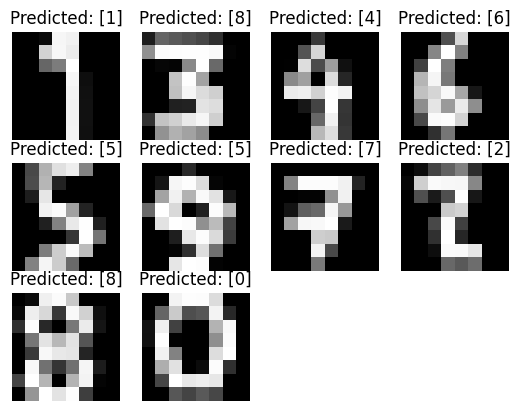

In [16]:
# import dependencies
import requests
from PIL import Image
import io

# set links
urls = [
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/one.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/three.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/four.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/six.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/five.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/nine.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/seven.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/two.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/eight.png',
    'https://raw.githubusercontent.com/HumbertoJim/DigitsClassifier/main/Images/zero.png'
]

for i, url in enumerate(urls):
    # get image from url
    im = Image.open(io.BytesIO(requests.get(url).content))

    # convert to gray scale
    im_gray = im.convert('L')

    # treat image to the same format of data color
    im_inverted = Image.eval(im_gray, lambda x: 255 - x)
    im_array = np.array(im_inverted)
    im_ok = im_array.reshape(64)

    # show image with the predicted class
    plt.subplot((len(urls))//4 + 1, (len(urls)+1)%4+1, i+1)
    plt.title("Predicted: {0}".format(best_model.predict([im_ok])))
    plt.imshow(im_array, cmap=plt.cm.gray)
    plt.axis('off')
plt.show()